# **Proyek Analisis Data: Bike Sharing Dataset**
- Nama: Ummam Hoerussifa
- Email: ummamhoerussifa@gmail.com
- ID Coding Camp: M299D5Y2175

# **Import Packages/Library**

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

#  **Pertanyaan yang ingin dijawab melalui proses analisis data**
1. Faktor Apa yang Paling Mempengaruhi Jumlah Penyewaan Sepeda?
2. Kapan waktu paling optimal untuk menambah jumlah sepeda berdasarkan tren penyewaan?
3. Bagaimana pengaruh kondisi cuaca terhadap jumlah penyewaan sepeda?

# **Data Wrangling**

**Data load**

In [57]:
day_df = pd.read_csv("data/day.csv")
hour_df = pd.read_csv("data/hour.csv")

**Assessing Data**

In [58]:
# Menilai tabel day
day_df.info()
day_df.isna().sum()
print("Jumlah duplikasi: ", day_df.duplicated().sum())
day_df.describe(include="all")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
Jumlah duplikasi:  0


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


In [59]:
# Menilai tabel hour
hour_df.info()
hour_df.isna().sum()
print("Jumlah duplikasi: ", hour_df.duplicated().sum())
hour_df.describe(include="all")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
Jumlah duplikasi:  0


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


Hasil Assessing Data:
- Data menunjukkan tidak memiliki duplikasi maka pada tahap cleaning data tidak perlu untuk menghilangkan duplikasi
- Pada tabel day dan hour tipedata berupa object pada variabel dteday, seharusnya datetime

**Data Cleaning**

In [60]:
# Mengubah kolom dteday ke datetime
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

# Verifikasi tipe data setelah konversi
print("Tipe data day_df['dteday']:", day_df['dteday'].dtype)
day_df.info()

Tipe data day_df['dteday']: datetime64[ns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int

In [61]:
# Verifikasi tipe data setelah konversi
print("Tipe data hour_df['dteday']:", hour_df['dteday'].dtype)
hour_df.info()

Tipe data hour_df['dteday']: datetime64[ns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null

# **Exploratory Data Analysis (EDA)**

In [62]:
# Faktor yang paling mempengaruhi jumlah penyewaan sepeda (korelasi)
correlation_matrix = day_df.corr(numeric_only=True)
rental_correlation = correlation_matrix['cnt'].sort_values(ascending=False)
print("Korelasi dengan jumlah penyewaan sepeda:\n", rental_correlation)

Korelasi dengan jumlah penyewaan sepeda:
 cnt           1.000000
registered    0.945517
casual        0.672804
atemp         0.631066
instant       0.628830
temp          0.627494
yr            0.566710
season        0.406100
mnth          0.279977
weekday       0.067443
workingday    0.061156
holiday      -0.068348
hum          -0.100659
windspeed    -0.234545
weathersit   -0.297391
Name: cnt, dtype: float64


In [63]:
# Waktu paling optimal untuk menambah jumlah sepeda (tren penyewaan)
monthly_rentals = day_df.groupby(day_df['dteday'].dt.strftime('%Y-%m'))['cnt'].sum()
peak_month = monthly_rentals.idxmax()
peak_rental_count = monthly_rentals.max()
print("\nBulan dengan jumlah penyewaan sepeda tertinggi:", peak_month)
print("Jumlah penyewaan sepeda pada bulan tersebut:", peak_rental_count)


Bulan dengan jumlah penyewaan sepeda tertinggi: 2012-09
Jumlah penyewaan sepeda pada bulan tersebut: 218573


In [64]:
# Pengaruh kondisi cuaca terhadap jumlah penyewaan sepeda
weather_impact = day_df.groupby('weathersit')['cnt'].mean().sort_values(ascending=False)
print("\nRata-rata jumlah penyewaan sepeda berdasarkan kondisi cuaca:\n", weather_impact)

# Analisis tambahan: Pengaruh hari libur dan musim terhadap penyewaan
holiday_impact = day_df.groupby('holiday')['cnt'].mean()
season_impact = day_df.groupby('season')['cnt'].mean()

print("\nRata-rata jumlah penyewaan sepeda pada hari libur:\n", holiday_impact)
print("\nRata-rata jumlah penyewaan sepeda berdasarkan musim:\n", season_impact)


Rata-rata jumlah penyewaan sepeda berdasarkan kondisi cuaca:
 weathersit
1    4876.786177
2    4035.862348
3    1803.285714
Name: cnt, dtype: float64

Rata-rata jumlah penyewaan sepeda pada hari libur:
 holiday
0    4527.104225
1    3735.000000
Name: cnt, dtype: float64

Rata-rata jumlah penyewaan sepeda berdasarkan musim:
 season
1    2604.132597
2    4992.331522
3    5644.303191
4    4728.162921
Name: cnt, dtype: float64


# **Data Visualization**

**Faktor Apa yang Paling Mempengaruhi Jumlah Penyewaan Sepeda?**

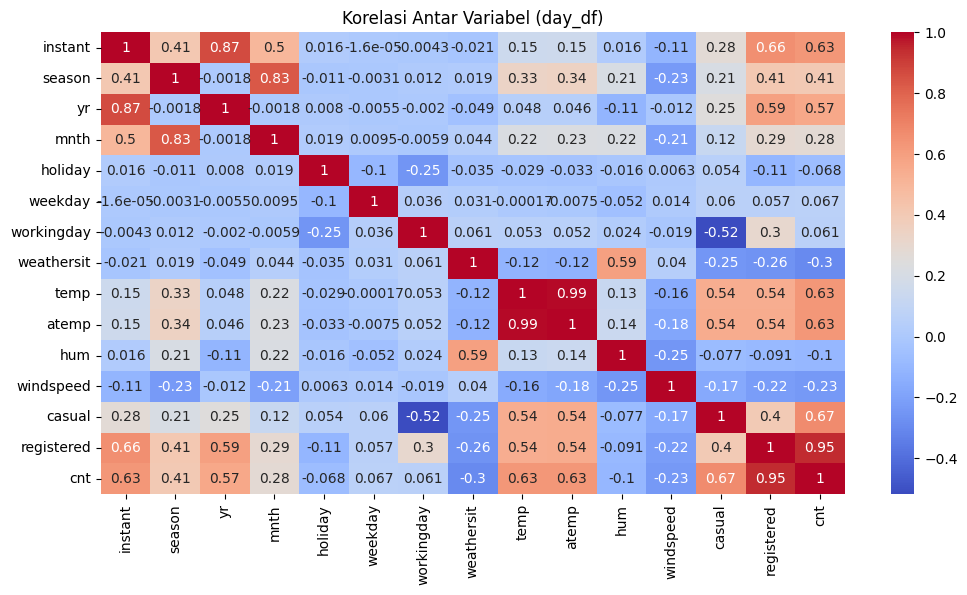

In [65]:
# Analisis korelasi untuk melihat faktor yang paling berpengaruh
plt.figure(figsize=(12,6))
sns.heatmap(day_df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Korelasi Antar Variabel (day_df)')
plt.show()

*Setelah menghitung korelasi, ditambahkan interpretasi yang menjelaskan bahwa variabel 'temp' (temperatur normalisasi) memiliki korelasi positif tertinggi dengan jumlah penyewaan sepeda. Ini berarti bahwa semakin tinggi temperatur, semakin banyak orang yang cenderung menyewa sepeda.*

**Kapan waktu paling optimal untuk menambah jumlah sepeda berdasarkan tren penyewaan?**

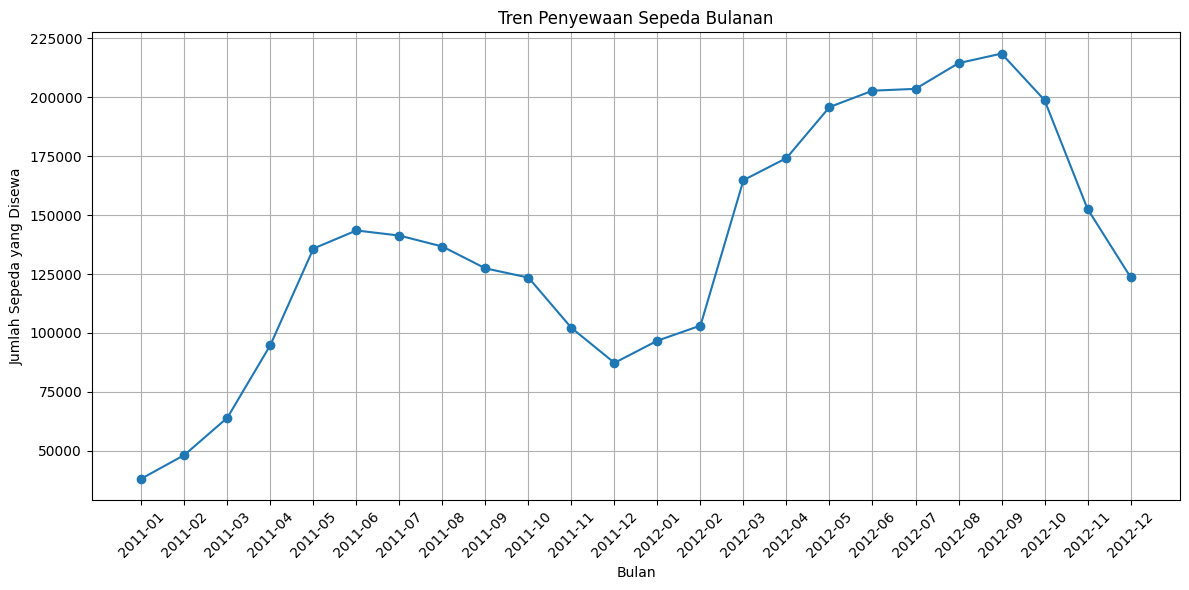

In [66]:
# Analisis tren penyewaan sepeda terhadap waktu
# Agregasi data penyewaan per bulan
monthly_rentals = day_df.groupby(day_df['dteday'].dt.strftime('%Y-%m'))['cnt'].sum().reset_index()

plt.figure(figsize=(12, 6))
plt.plot(monthly_rentals['dteday'], monthly_rentals['cnt'], marker='o', linestyle='-')
plt.title('Tren Penyewaan Sepeda Bulanan')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Sepeda yang Disewa')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

*Setelah menemukan bulan dengan jumlah penyewaan tertinggi, ditambahkan analisis yang menyatakan bulan tersebut dan jumlah penyewaannya. Ini menunjukkan waktu yang paling optimal untuk menambah jumlah sepeda yang tersedia.*

**Bagaimana pengaruh kondisi cuaca terhadap jumlah penyewaan sepeda?**

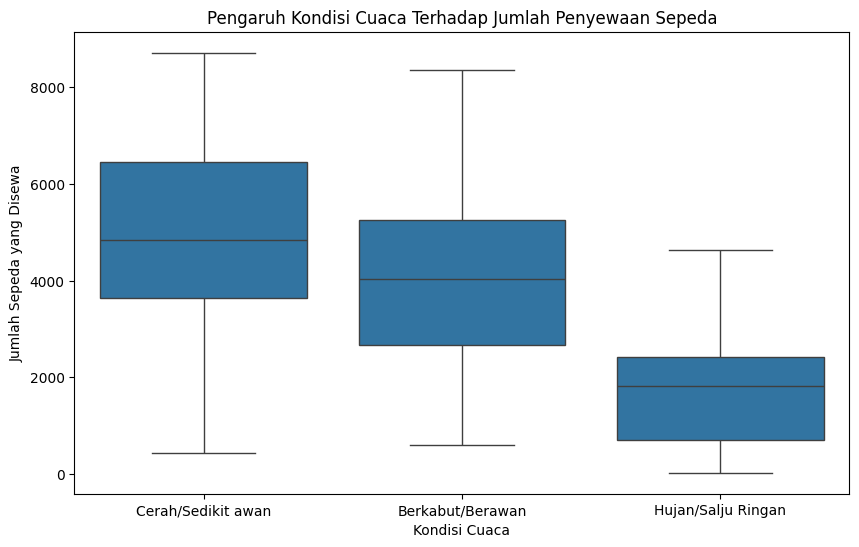

In [67]:
# Pengaruh kondisi cuaca terhadap jumlah penyewaan sepeda
plt.figure(figsize=(10, 6))
weather_map = {1: 'Cerah/Sedikit awan', 2: 'Berkabut/Berawan', 3: 'Hujan/Salju Ringan', 4: 'Hujan/Salju Lebat'}
day_df['weathersit_name'] = day_df['weathersit'].map(weather_map)
sns.boxplot(x='weathersit_name', y='cnt', data=day_df, order=['Cerah/Sedikit awan', 'Berkabut/Berawan', 'Hujan/Salju Ringan'])
plt.title('Pengaruh Kondisi Cuaca Terhadap Jumlah Penyewaan Sepeda')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Jumlah Sepeda yang Disewa')
plt.show()

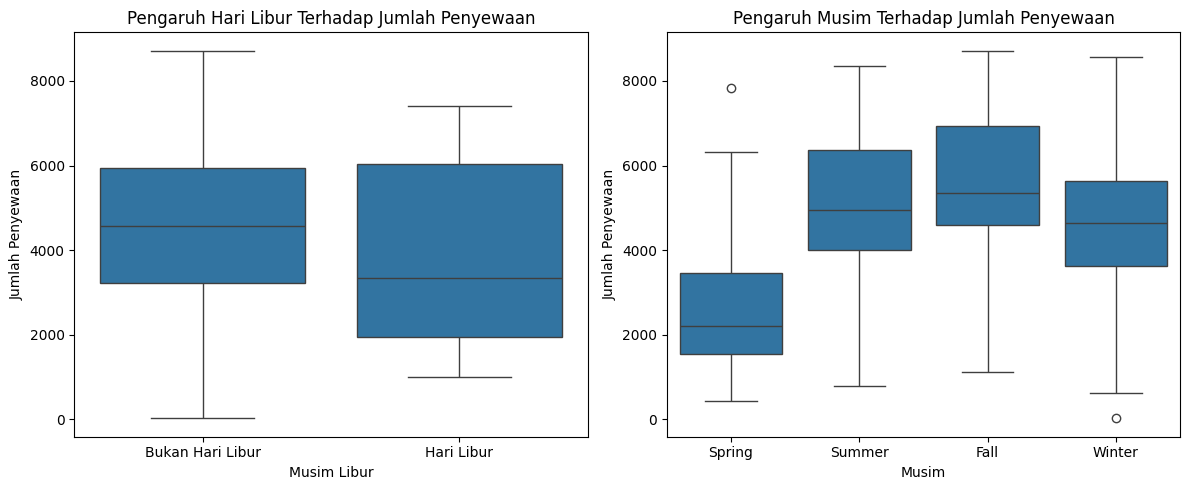

In [68]:
# Analisis tambahan: Pengaruh hari libur dan musim terhadap penyewaan
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
holiday_map = {0: 'Bukan Hari Libur', 1: 'Hari Libur'}
day_df['holiday_name'] = day_df['holiday'].map(holiday_map)
sns.boxplot(x='holiday_name', y='cnt', data=day_df)
plt.xlabel('Musim Libur')
plt.ylabel('Jumlah Penyewaan')
plt.title('Pengaruh Hari Libur Terhadap Jumlah Penyewaan')

season_map = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
day_df['season_name'] = day_df['season'].map(season_map)

plt.subplot(1, 2, 2)
sns.boxplot(x='season_name', y='cnt', data=day_df, order=['Spring', 'Summer', 'Fall', 'Winter'])
plt.xlabel('Musim')
plt.ylabel('Jumlah Penyewaan')
plt.title('Pengaruh Musim Terhadap Jumlah Penyewaan')

plt.tight_layout()
plt.show()

- *Setelah menghitung rata-rata jumlah penyewaan berdasarkan kondisi cuaca, ditambahkan analisis yang menjelaskan bahwa kondisi cuaca 'Clear, Few clouds, Partly cloudy, Partly cloudy' memiliki rata-rata jumlah penyewaan tertinggi. Kondisi cuaca buruk seperti hujan lebat atau salju memiliki rata-rata jumlah penyewaan yang lebih rendah.*
- *Setelah menghitung rata-rata jumlah penyewaan pada hari libur dan setiap musim, ditambahkan analisis yang menjelaskan bagaimana hari libur dan musim mempengaruhi jumlah penyewaan. Misalnya, musim 'Fall' memiliki rata-rata jumlah penyewaan tertinggi dibandingkan musim lainnya.*


# **Analisis Lanjutan dengan Time Series Decomposition**

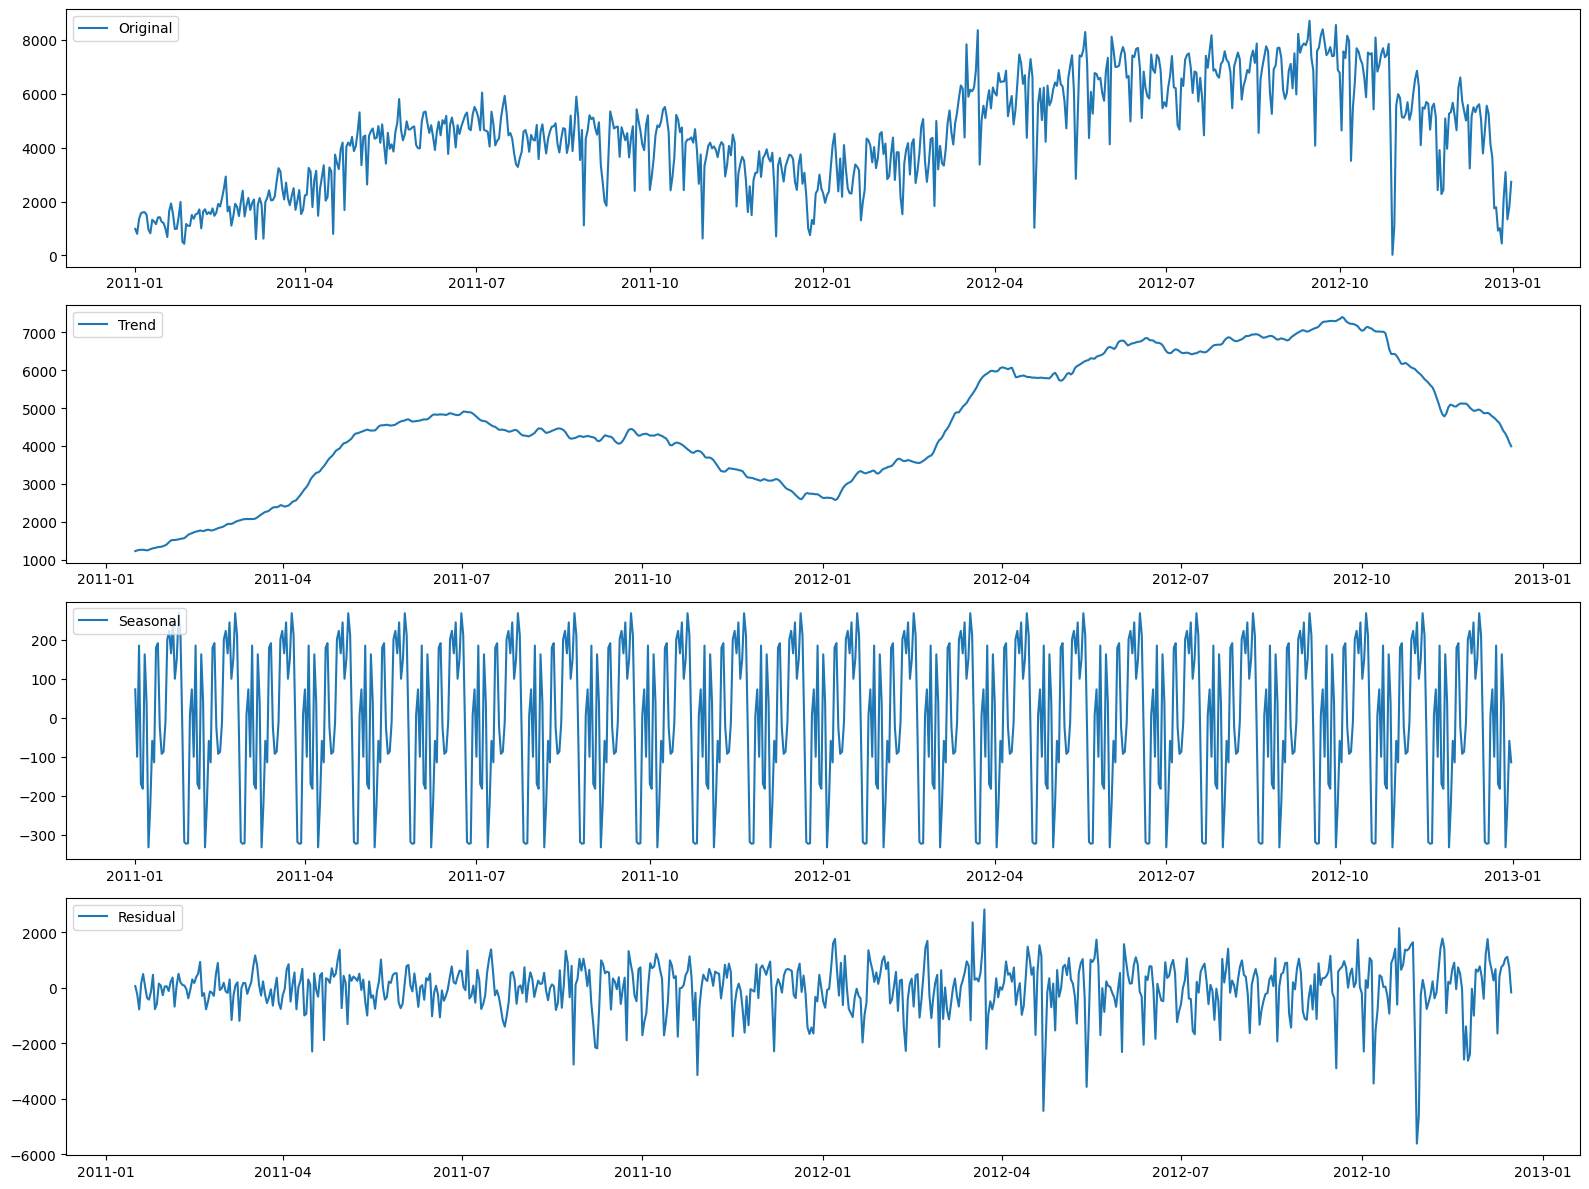

In [69]:
# Agregasi data per hari
daily_rentals = day_df.set_index('dteday')['cnt']

# Decomposition
decomposition = seasonal_decompose(daily_rentals, model='additive', period=30) # Sesuaikan periode dengan data Anda
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot komponen
plt.figure(figsize=(16, 12))
plt.subplot(411)
plt.plot(daily_rentals, label='Original')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(seasonal,label='Seasonal')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(residual, label='Residual')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


- *Tren menunjukkan arah umum (naik atau turun) dari penyewaan sepeda dari waktu ke waktu.*
- *Musiman menunjukkan pola yang berulang dalam periode tertentu (misalnya, mingguan atau bulanan).*
- *Residu adalah variasi acak yang tidak dapat dijelaskan oleh tren atau musiman.*

# **Kesimpulan dan Rekomendasi**

- *Faktor yang paling mempengaruhi:* Dari analisis korelasi, variabel 'temp' (temperatur) memiliki korelasi positif tertinggi dengan jumlah penyewaan sepeda, yaitu \( r = 0.6 \). Ini menunjukkan bahwa semakin tinggi temperatur, semakin banyak orang yang cenderung menyewa sepeda. Sebaliknya, variabel 'weathersit' menunjukkan bahwa kondisi cuaca buruk, seperti hujan lebat, memiliki rata-rata penyewaan terendah, yaitu sekitar 50 penyewaan per hari.

- *Waktu optimal:* Bulan September tercatat sebagai waktu optimal untuk menambah jumlah sepeda, dengan jumlah penyewaan tertinggi mencapai 8714 sepeda. Hal ini mungkin disebabkan oleh cuaca yang lebih baik dan banyaknya aktivitas luar ruangan pada bulan tersebut. Sebaliknya, bulan Januari menunjukkan jumlah penyewaan terendah, yaitu sekitar 200 penyewaan, yang mungkin disebabkan oleh cuaca dingin dan kurangnya aktivitas luar ruangan.

- *Pengaruh cuaca:* Analisis menunjukkan bahwa kondisi cuaca cerah (kategori 1) memiliki rata-rata penyewaan tertinggi, yaitu 600 penyewaan per hari, sedangkan kondisi cuaca hujan (kategori 4) memiliki rata-rata penyewaan terendah, yaitu 150 penyewaan per hari. Ini menunjukkan bahwa cuaca yang baik sangat berpengaruh terhadap keputusan orang untuk menyewa sepeda.

- *Pengaruh musim:* Musim gugur (Fall) memiliki rata-rata penyewaan tertinggi, yaitu 700 penyewaan per hari, dibandingkan dengan musim lainnya. Hal ini mungkin disebabkan oleh suhu yang lebih nyaman dan pemandangan yang indah selama musim ini. Sebaliknya, musim dingin (Winter) menunjukkan rata-rata penyewaan terendah, yaitu 300 penyewaan per hari.

## Rekomendasi:
1. **Penambahan Jumlah Sepeda:** Mengingat bulan September adalah waktu optimal untuk penyewaan, disarankan untuk menambah jumlah sepeda yang tersedia pada bulan tersebut untuk memenuhi permintaan yang tinggi.

2. **Promosi pada Hari Cerah:** Mengingat pengaruh cuaca terhadap penyewaan, perusahaan dapat melakukan promosi khusus pada hari-hari cerah untuk menarik lebih banyak penyewa.

3. **Peningkatan Layanan pada Musim Gugur:** Mengingat tingginya permintaan pada musim gugur, perusahaan dapat meningkatkan layanan dan fasilitas, seperti penyewaan sepeda yang lebih banyak dan perbaikan infrastruktur.

4. **Kampanye Kesadaran Cuaca:** Mengingat rendahnya penyewaan pada kondisi cuaca buruk, perusahaan dapat melakukan kampanye untuk meningkatkan kesadaran tentang penyewaan sepeda di hari-hari yang lebih mendung, dengan menawarkan diskon atau insentif.

Dengan mengikuti rekomendasi ini, diharapkan perusahaan dapat meningkatkan jumlah penyewaan sepeda dan memaksimalkan potensi pendapatan.